## Novice program

In [1]:
    _default_rep_scaler_func = None
    _default_intensity_scaler_func = None
    _default_reps_to_intensity_func = None
    _default_progression_func = None

In [4]:
from streprogen.modeling import progression_sinusoidal

import functools

progression_sinusoidal?

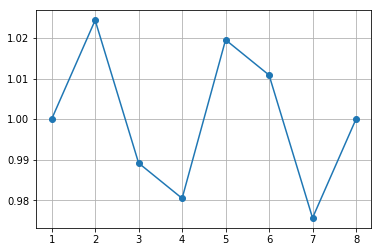

In [12]:
func = functools.partial(progression_sinusoidal, 
                         start_weight=1,
    final_weight=1,
    start_week=1,
    end_week=8,
    periods=2,
    scale=0.025,
    offset=0,
    k=0)

x = list(range(1, 9))

import matplotlib.pyplot as plt

plt.plot(x, [func(i) for i in x], '-o', label="normal")
plt.grid()
plt.show()

In [ ]:
1/0

In [ ]:
from streprogen.modeling import reps_to_intensity


x = list(range(1, 11))

import matplotlib.pyplot as plt

plt.plot(x, [reps_to_intensity(i, slope=-4) for i in x], '-o', label="normal")
plt.plot(x, [reps_to_intensity(i, slope=-3.5) for i in x], '-o', label="tight")
plt.plot(x, [reps_to_intensity(i, slope=-4.5) for i in x], '-o', label="relaxed")
plt.grid()
plt.show()

In [ ]:
from streprogen.modeling import progression_diffeq
import functools

end_week = 8

p = functools.partial(progression_diffeq, start_weight=0, final_weight=100, start_week=1, end_week=end_week)

x = list(range(1, end_week + 1))

import matplotlib.pyplot as plt

plt.plot(x, [p(i, k=0) for i in x], '-o', label="k=0")
plt.plot(x, [p(i, k=1) for i in x], '-o', label="k=1")
plt.plot(x, [p(i, k=2) for i in x], '-o', label="k=2")
#plt.grid()
plt.show()

### Imports

In [ ]:
from streprogen import Program

### Program setup

In [ ]:
program = Program(
    # The name of the training program
    name='MyFirstProgram',
    # The duration of the training program in weeks.
    duration=8,
    # The baseline number of repetitions per dynamic exercise.
    reps_per_exercise=25,
    # Units for the weights, typically 'kg', 'lbs' or '' (empty)
    units='kg',
    # What the weights are rounded to.
    round_to=5,
)

with program.Day():
    program.DynamicExercise(name="Bench", start_weight=80, min_reps=3, max_reps=8)
    program.DynamicExercise(name="Squats", start_weight=100, min_reps=3, max_reps=8)
    program.StaticExercise('Curls', '3 x 12')
    
with program.Day():
    program.DynamicExercise(name="Military press", start_weight=50, min_reps=3, max_reps=8)
    program.DynamicExercise(name="Squats", start_weight=90, min_reps=3, max_reps=8)

### Render the program

In [ ]:
# Do the computations and render a program. Might take a few seconds.
program.render()

### Print and save the program

In [ ]:
print(program)

In [ ]:
# Save the program as a HTML file
with open('simple_program.html', 'w', encoding='utf-8') as file:
    # Control table width by passing the 'table_width' argument
    file.write(program.to_html(table_width=8))